In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

In [3]:
# remove the first row 
data_xgboost = pd.read_csv(r"D:\AppliedAI\Homework-n-Assignments\# 20 Quora\final_features_old.csv")
data_xgboost = data_xgboost.head(80000)
data_xgboost.drop(data_xgboost.index[0], inplace=True)
y_true_xgboost = data_xgboost['is_duplicate']
data_xgboost.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

In [4]:
print (data_xgboost.shape)
data_xgboost.head()

(79999, 794)


,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,...,-4.901128,-4.565393,41.520751,-0.727564,-16.413776,-7.373778,2.638877,-7.403457,2.703070,0.408040
2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,...,8.359966,-2.165985,10.936580,-16.531660,14.681230,15.633759,-1.210901,14.183826,11.703135,10.148075
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,...,3.311411,3.788879,13.398598,-6.592596,6.437365,5.993293,2.732392,-3.727647,5.614115,6.023693
4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,...,-2.403870,11.991204,8.088483,-15.090201,8.375166,1.727225,-6.601129,11.317413,11.544603,2.478689
5,0.666656,0.571420,0.888879,0.799992,0.705878,0.705878,1.0,0.0,0.0,17.0,...,10.240244,10.188453,18.522278,-19.722884,-8.420450,9.489836,-7.418802,18.077984,16.476179,-2.602082


<h2> 4.2 Converting strings to numerics </h2>

In [ ]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

In [5]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true_xgboost = list(map(int, y_true_xgboost))
print (len(y_true_xgboost))

79999


<h2> 4.3 Random train test split( 70:30) </h2>

In [6]:
X_train_xgboost,X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(data_xgboost, y_true_xgboost, stratify=y_true_xgboost, test_size=0.3)

In [6]:
print("Number of data points in train data for XGBoost setup :",X_train_xgboost.shape)
print("Number of data points in test data for XGBoost setup:",X_test_xgboost.shape)

Number of data points in train data for XGBoost setup : (55999, 794)
Number of data points in test data for XGBoost setup: (24000, 794)


In [7]:
print("-"*10, "Distribution of output variable in train data for xgboost setup", "-"*10)
train_distr_xgboost = Counter(y_train_xgboost)
train_len_xgboost = len(y_train_xgboost)
print("Class 0: ",int(train_distr_xgboost[0])/train_len_xgboost,"Class 1: ", int(train_distr_xgboost[1])/train_len_xgboost)
print("-"*10, "Distribution of output variable in train data for xgboost setup", "-"*10)
test_distr_xgboost = Counter(y_test_xgboost)
test_len_xgboost = len(y_test_xgboost)
print("Class 0: ",int(test_distr_xgboost[1])/test_len_xgboost, "Class 1: ",int(test_distr_xgboost[1])/test_len_xgboost)

---------- Distribution of output variable in train data for xgboost setup ----------
Class 0:  0.6274754906337613 Class 1:  0.3725245093662387
---------- Distribution of output variable in train data for xgboost setup ----------
Class 0:  0.37254166666666666 Class 1:  0.37254166666666666


In [8]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> Building a random model (Finding worst-case log-loss XGBoost) </h2>

Log loss on Test Data using Random Model 0.8909061016014086


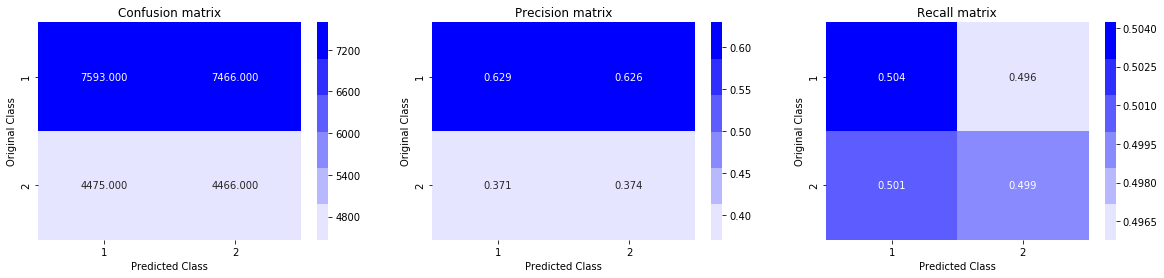

In [9]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y_xgboost = np.zeros((test_len_xgboost,2))
for i in range(test_len_xgboost):
    rand_probs_xgboost = np.random.rand(1,2)
    predicted_y_xgboost[i] = ((rand_probs_xgboost/sum(sum(rand_probs_xgboost)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test_xgboost, predicted_y_xgboost, eps=1e-15))

predicted_y_xgboost =np.argmax(predicted_y_xgboost, axis=1)
plot_confusion_matrix(y_test_xgboost, predicted_y_xgboost)

<h2> 4.6 XGBoost </h2>

In [12]:
from xgboost import XGBClassifier

from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import warnings
warnings.filterwarnings("ignore")


XGB = XGBClassifier(booster='gbtree',objective = 'binary:logistic',eval_metric= 'logloss')

param_grid = {'max_depth':[1,3,5,7,9],'n_estimators':[50,100,200,300,500]}
xgboost_GBDT = RandomizedSearchCV(XGB,param_grid,cv=3, verbose=2)
xgboost_GBDT.fit(X_train_xgboost,y_train_xgboost)
xgboost_GBDT.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=500, max_depth=7 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=500, max_depth=7, total=43.1min
[CV] n_estimators=500, max_depth=7 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 43.1min remaining:    0.0s


[CV] .................... n_estimators=500, max_depth=7, total=44.6min
[CV] n_estimators=500, max_depth=7 ...................................
[CV] .................... n_estimators=500, max_depth=7, total=43.9min
[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total= 6.3min
[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total= 6.3min
[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total= 6.3min
[CV] n_estimators=200, max_depth=7 ...................................
[CV] .................... n_estimators=200, max_depth=7, total=17.4min
[CV] n_estimators=200, max_depth=7 ...................................
[CV] .................... n_estimators=200, max_depth=7, total=17.7min
[CV] n_estimators=200, max_depth=7 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 561.6min finished


{'n_estimators': 500, 'max_depth': 7}

In [9]:
from xgboost import XGBClassifier

from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import warnings

besthyperpara_xgboost = XGBClassifier(booster='gbtree',objective = 'binary:logistic',eval_metric= 'logloss',max_depth=9,n_estimators=500)
besthyperpara_xgboost.fit(X_train_xgboost,y_train_xgboost)
sig_clf = CalibratedClassifierCV(besthyperpara_xgboost, method="sigmoid")
sig_clf.fit(X_train_xgboost, y_train_xgboost)
predict_y_xgboo = sig_clf.predict_proba(X_test_xgboost)

In [11]:
print (log_loss(y_test_xgboost, predict_y_xgboo, labels=besthyperpara_xgboost.classes_, eps=1e-15))

0.3644462554369013


In [13]:
print (type(predict_y_xgboo))
print (predict_y_xgboo.shape)

<class 'numpy.ndarray'>
(24000, 2)


In [16]:
predicted_y_xgboo =np.argmax(predict_y_xgboo,axis=1)
print (type(predicted_y_xgboo))
print (predicted_y_xgboo.shape)

<class 'numpy.ndarray'>
(24000,)


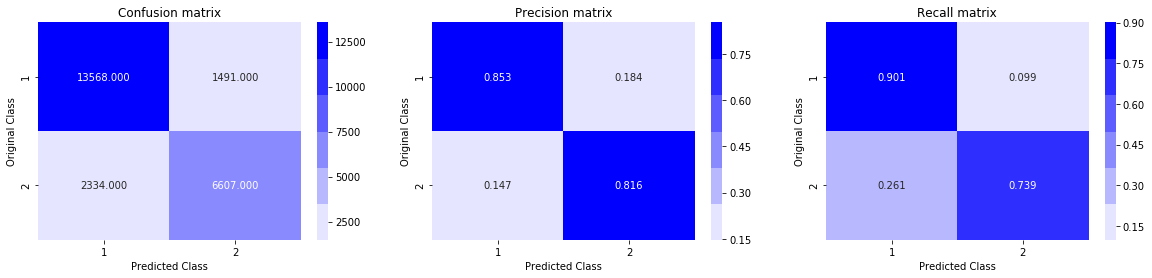

In [17]:
plot_confusion_matrix(y_test_xgboost, predicted_y_xgboo)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.
